In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
import pickle

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/GP Project/biometric/csv_files/Uniform_users.csv")
df_l = pd.read_csv("/content/drive/MyDrive/Projects/GP Project/biometric/csv_files/Uniform_users_labeled.csv")

In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace = True)
df_l.drop(columns=df_l.columns[0], axis=1, inplace = True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,label
0,58.940648,55.443665,62.649820,61.057350,47.074409,40.049969,23.537205,65.734314,63.694584,59.033889,53.150729,5
1,59.665736,48.836462,54.744863,53.600373,40.261644,37.013511,20.615528,63.631753,63.568860,60.671245,56.222771,5
2,58.309519,51.000000,54.405882,63.007936,39.623226,41.109610,21.095023,61.400326,60.926185,57.870545,52.153619,5
3,58.463664,49.819675,55.901699,54.405882,40.521599,37.054015,21.587033,62.433965,62.032250,58.855756,55.145263,5
4,57.870545,50.990195,56.089215,55.605755,42.720019,37.054015,21.377558,62.681736,61.846584,59.033889,54.037024,5


In [ ]:
df_l.head()

,0,1,2,3,4,5,6,7,8,9,10,label,id
0,58.940648,55.443665,62.649820,61.057350,47.074409,40.049969,23.537205,65.734314,63.694584,59.033889,53.150729,5,11
1,59.665736,48.836462,54.744863,53.600373,40.261644,37.013511,20.615528,63.631753,63.568860,60.671245,56.222771,5,11
2,58.309519,51.000000,54.405882,63.007936,39.623226,41.109610,21.095023,61.400326,60.926185,57.870545,52.153619,5,11
3,58.463664,49.819675,55.901699,54.405882,40.521599,37.054015,21.587033,62.433965,62.032250,58.855756,55.145263,5,11
4,57.870545,50.990195,56.089215,55.605755,42.720019,37.054015,21.377558,62.681736,61.846584,59.033889,54.037024,5,11


In [ ]:
x = df.loc[:, df.columns != 'label']
y = df.label

x_l = df_l.loc[:, df_l.columns != 'label']
y_l = df_l.label

x_nl = df_l.loc[:, df_l.columns != 'label']
y_nl = df_l.label

x_nl = x_nl.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [ ]:
# original
X_train, X_both, y_train, y_both = train_test_split(x, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)
#labeled
X_train_L, X_both_L, y_train_L, y_both_L = train_test_split(x_l, y_l, test_size = 0.2, random_state=3)
X_test_L, X_valid_L, y_test_L, y_valid_L = train_test_split(X_both_L, y_both_L, test_size = 0.5, random_state=3)
#normalized Labeled
X_train_NL, X_both_NL, y_train_NL, y_both_NL = train_test_split(x_nl, y_nl, test_size = 0.2, random_state=3)
X_test_NL, X_valid_NL, y_test_NL, y_valid_NL = train_test_split(X_both_NL, y_both_NL, test_size = 0.5, random_state=3)


In [ ]:
#original models
rf = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/random_forest.pickle', "rb"))
knn = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/knn.pickle', "rb"))
dtree = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/dtree.pickle', "rb"))
svc = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/svm.pickle', "rb"))
lr = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/lr.pickle', "rb"))

#labeled images models
rf_l = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/random_forest_label.pickle', "rb"))
knn_l = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/knn_label.pickle', "rb"))
dtree_l = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/dtree_label.pickle', "rb"))
svc_l = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/svm_label.pickle', "rb"))
lr_l = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/lr_label.pickle', "rb"))

#labeled iamges and normalized models
rf_nl = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/random_forest_nl.pickle', "rb"))
knn_nl = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/knn_nl.pickle', "rb"))
dtree_nl = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/dtree_nl.pickle', "rb"))
svc_nl = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/svm_nl.pickle', "rb"))
lr_nl = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/lr_nl.pickle', "rb"))

# Plotting


In [ ]:
y_pred1 = knn.predict(X_test)
y_pred1_l = knn_l.predict(X_test_L)
y_pred1_nl= knn_nl.predict(X_test_NL)

In [ ]:
y_pred2 = rf.predict(X_test)
y_pred2_l = rf_l.predict(X_test_L)
y_pred2_nl= rf_nl.predict(X_test_NL)

In [ ]:
y_pred3 = lr.predict(X_test)
y_pred3_l = lr_l.predict(X_test_L)
y_pred3_nl= lr_nl.predict(X_test_NL)

In [ ]:
y_pred4 = dtree.predict(X_test)
y_pred4_l = dtree_l.predict(X_test_L)
y_pred4_nl= dtree_nl.predict(X_test_NL)

In [ ]:
y_pred5 = svc.predict(X_test)
y_pred5_l = svc_l.predict(X_test_L)
y_pred5_nl= svc_nl.predict(X_test_NL)

In [ ]:
#making a dictionary with each word in our dataset as a key
my_dic = {'User1': 1, 'User2': 2, 'User3': 3, 'User4': 4, 'User5': 5}

#making a list of the dataset words
dic = list(my_dic)
outputss = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
my_titles = ["KNN","Random Forest","Logistic","Decision Tree","SVM"]

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, round(y[i],2), ha = 'center')

Text(0, 0.5, 'F1 Score')

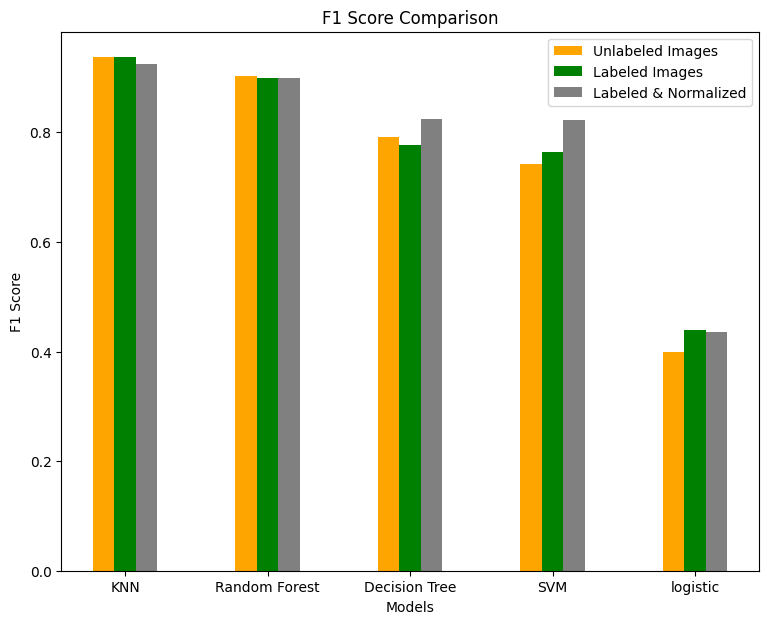

In [ ]:
#plotting the f1-score comparison
x = []
l = []
nl = []

outputs = [y_pred1, y_pred2, y_pred4, y_pred5, y_pred3]
outputs_l = [y_pred1_l, y_pred2_l, y_pred4_l, y_pred5_l, y_pred3_l]
outputs_nl = [y_pred1_nl, y_pred2_nl, y_pred4_nl, y_pred5_nl, y_pred3_nl]

my_titles = ["KNN","Random Forest","Decision Tree","SVM","logistic"]
for i in range(len(outputs)):
  x.append(f1_score(y_test, outputs[i], average='weighted'))

for i in range(len(outputs_l)):
  l.append(f1_score(y_test, outputs_l[i], average='weighted'))

for i in range(len(outputs_nl)):
  nl.append(f1_score(y_test, outputs_nl[i], average='weighted'))


x.sort(reverse=True)
plt.figure(figsize=(9,7)) 
plt.title("F1 Score Comparison")

X_axis = np.arange(5)
plt.bar(X_axis - 0.15, x, 0.15, label = 'Unlabeled Images', color="orange")
plt.bar(X_axis, l, 0.15, label = 'Labeled Images', color="green")
plt.bar(X_axis + 0.15, nl, 0.15, label = 'Labeled & Normalized', color="grey")
plt.xticks(X_axis, my_titles)  

# addlabels(my_titles,x)
plt.xlabel("Model Name")
plt.legend()  
plt.xlabel('Models')  
plt.ylabel("F1 Score")